In [247]:
import pandas as pd
import json
import matplotlib.pyplot as plt
f = open("GameList.json",'r')

GameList = json.loads(f.read())

In [248]:
def convertFileName(name):
    name = name.replace("'","")
    name = name.replace("&","and")
    return name

In [249]:
def getGameNameFile(CompanyName,i):
    #得到有底線的遊戲名稱(檔案名稱)
    with open('GameList.json','r') as fp:
        tmp = json.loads(fp.read())
    tmp = tmp[CompanyName]["game"][i].replace("&","and")
    tmp = tmp.replace(":","")
    tmp = tmp.replace("'","")
    tmp = tmp.replace(" ","_")
    return tmp

def getLength(CompanyName):
    #得到公司的遊戲數量
    with open('GameList.json','r') as fp:
        tmp = json.loads(fp.read())  
    length =len(tmp[CompanyName]["game"])
    return length


In [250]:
def marge(CompanyName):
    #產生初始pd 並把viewer歸0
    initial = getGameNameFile(CompanyName,0) + ".json"
    with open(initial,"r") as fp:
        initial = json.loads(fp.read())
    initial = pd.DataFrame({'Date' : initial["Date"],'Viewer' :initial["Viewer"]})
    initial['Viewer'] = 0
    
    #開始累加
    for i in range(getLength(CompanyName)):
        initial = selFile(CompanyName,i,initial)
    return initial

In [251]:
def selFile(CompanyName,i,res):
    File = getGameNameFile(CompanyName,i) + ".json"
    with open(File,'r') as f:
        singleData = f.read()
        singleData = json.loads(singleData)
        df = pd.DataFrame(singleData)
        res['Viewer'] = res['Viewer'] + df['Viewer']
    return res

In [252]:
res = marge("Nexon")

In [253]:
from io import StringIO
f = open(r"C:\stockInformationWithOutMining\Nexon.txt","r+",)
publisher = f.read()
f.close()
publisher_df = pd.read_csv(StringIO(publisher))
publisher_df = publisher_df
publisher_df = publisher_df.drop(["Open","Low","Close","Adj Close","Volume"],axis = 1)
res = pd.merge(publisher_df,res,on = 'Date')

In [254]:
pd.set_option('display.max_rows', res.shape[0]+1)
res

,Date,High,Viewer
0,2017-01-04,862.5,3182.0
1,2017-01-05,867.0,3546.0
2,2017-01-06,861.5,6833.0
3,2017-01-10,868.5,10392.0
4,2017-01-11,867.5,2674.0
5,2017-01-12,857.5,3841.0
6,2017-01-13,886.0,4330.0
7,2017-01-16,877.5,7309.0
8,2017-01-17,859.0,3403.0
9,2017-01-18,844.5,4364.0


In [255]:
import warnings
from collections import OrderedDict
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [256]:
#建立資料並檢視資料
examDict= res
examOrderedDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderedDict)
examDf.head()
#檢視資料描述統計資訊
examDf.describe()

,High,Viewer
count,755.000000,755.000000
mean,1455.737748,8409.019868
std,286.089787,7484.384429
min,830.000000,1270.000000
25%,1293.500000,3598.000000
50%,1499.000000,5989.000000
75%,1672.250000,10472.000000
max,2005.000000,52979.000000


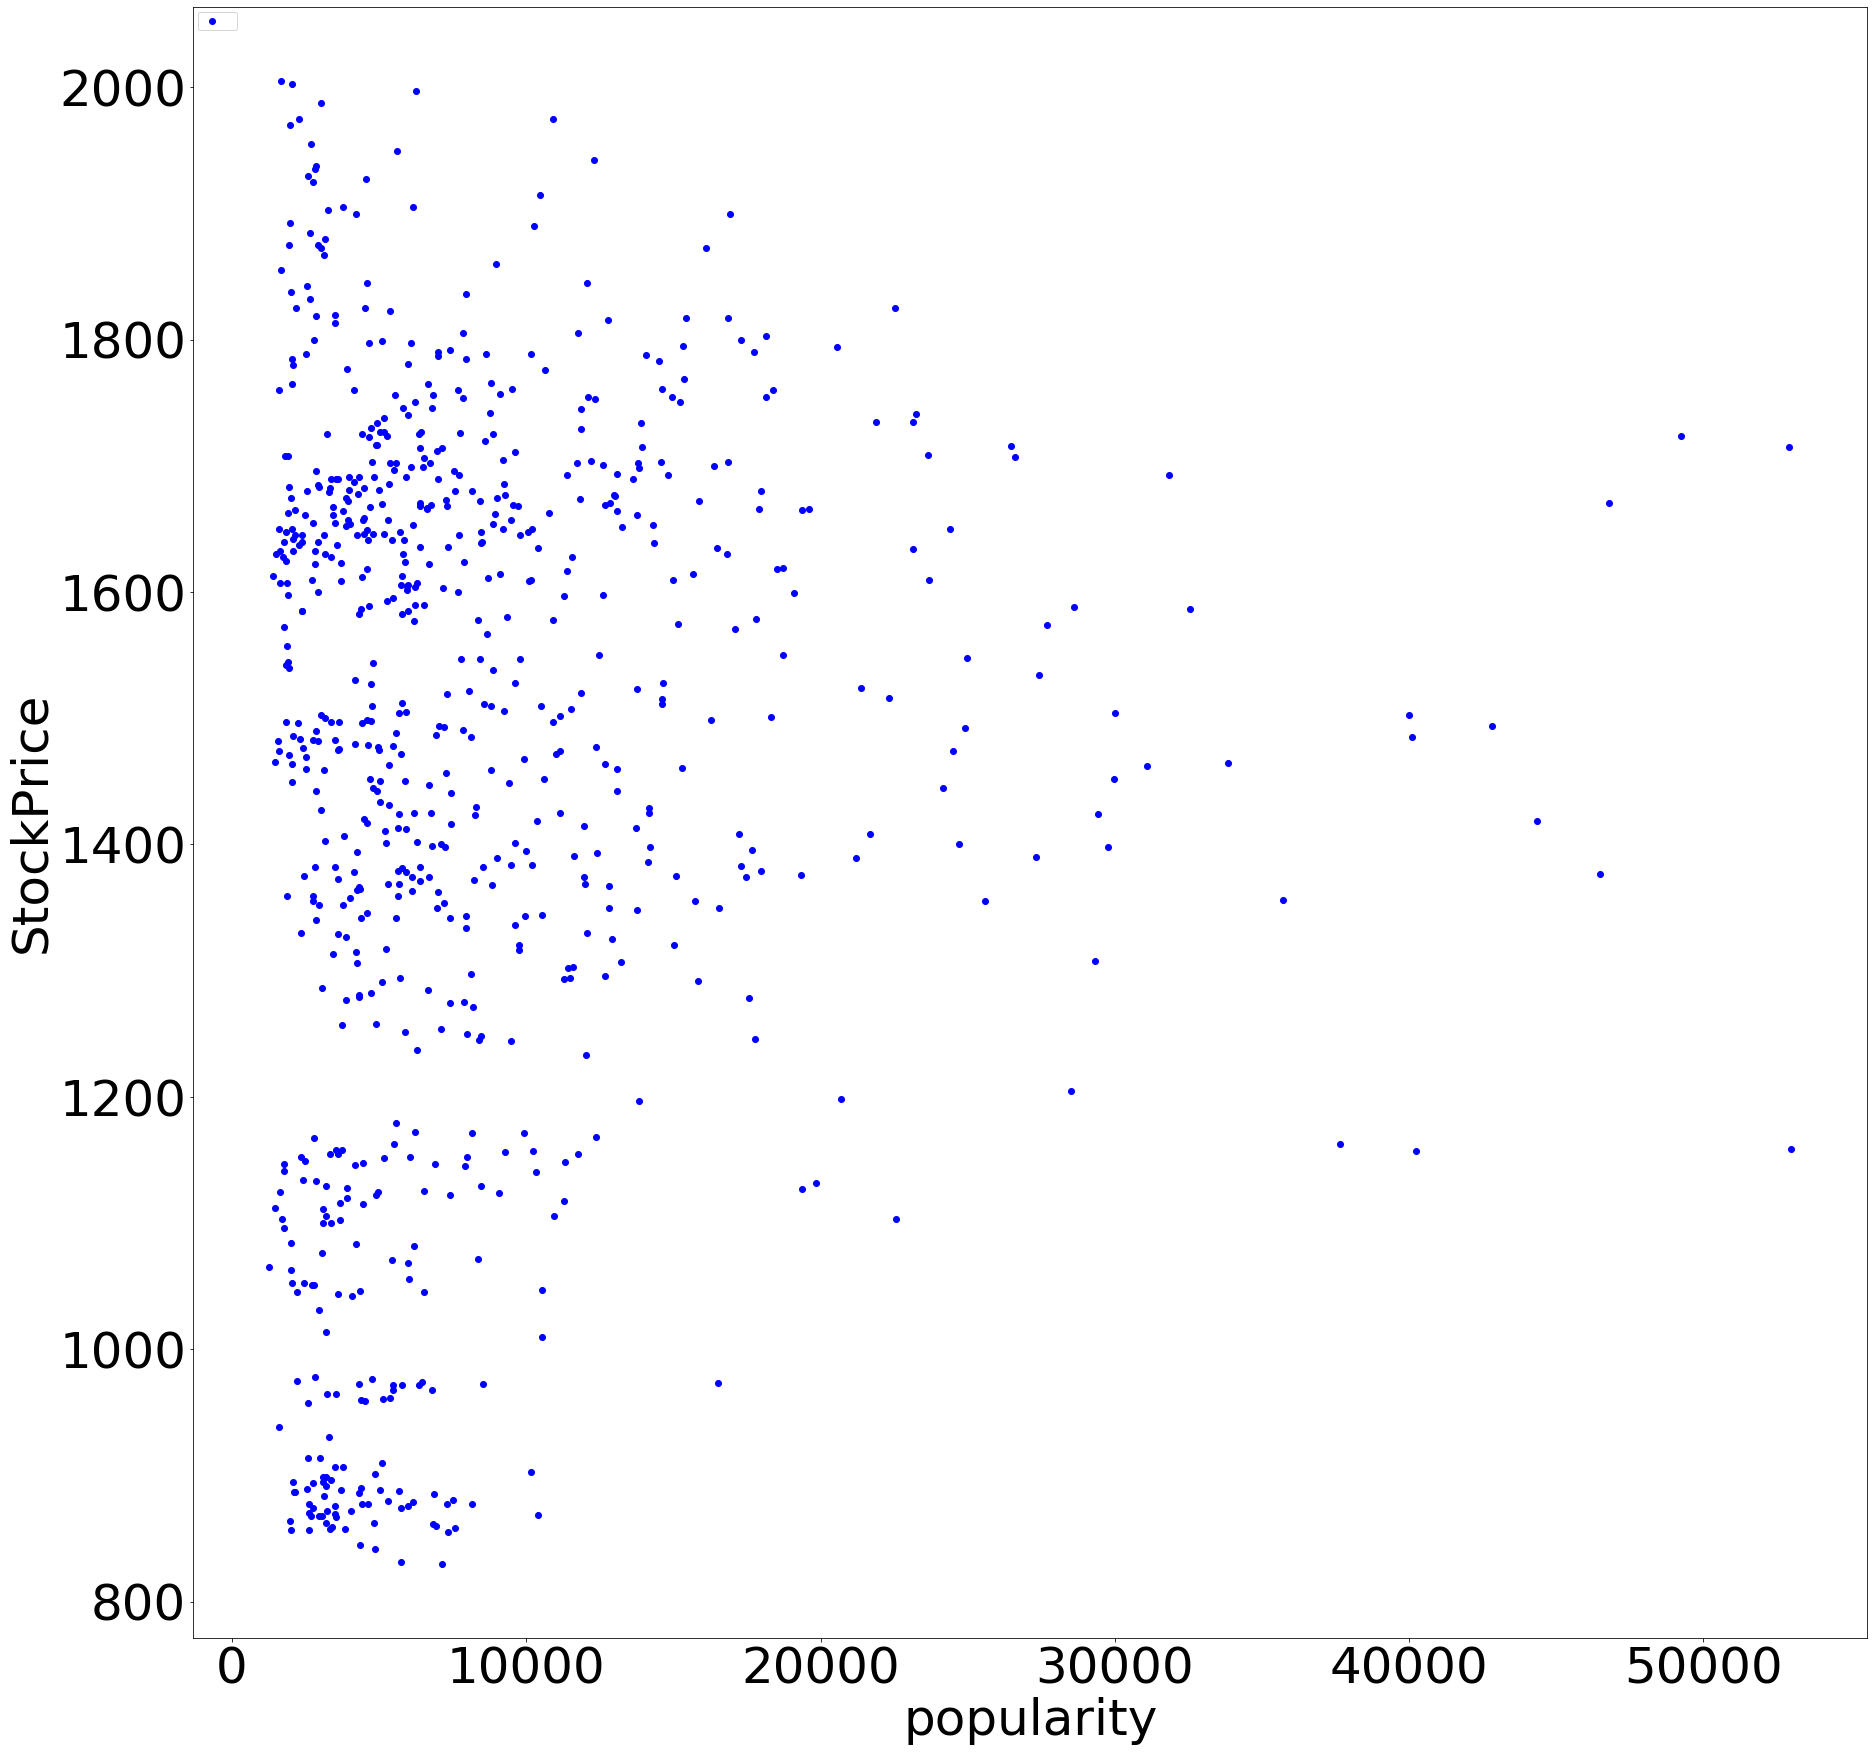

In [257]:
exam_X=examDf['Viewer']
exam_y=examDf['High']

#散點圖
plt.scatter(exam_X,exam_y,color='b',label=' ')
#橫縱軸標籤
plt.legend(loc=2)
plt.xlabel('popularity',fontsize = 50)
plt.ylabel('StockPrice',fontsize = 50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.savefig("Nexon_scatter.png")
plt.show()


In [258]:
#變數間的相關係數
rDf=examDf.corr()
print(rDf)

            High    Viewer
High    1.000000  0.113712
Viewer  0.113712  1.000000


1096
1096


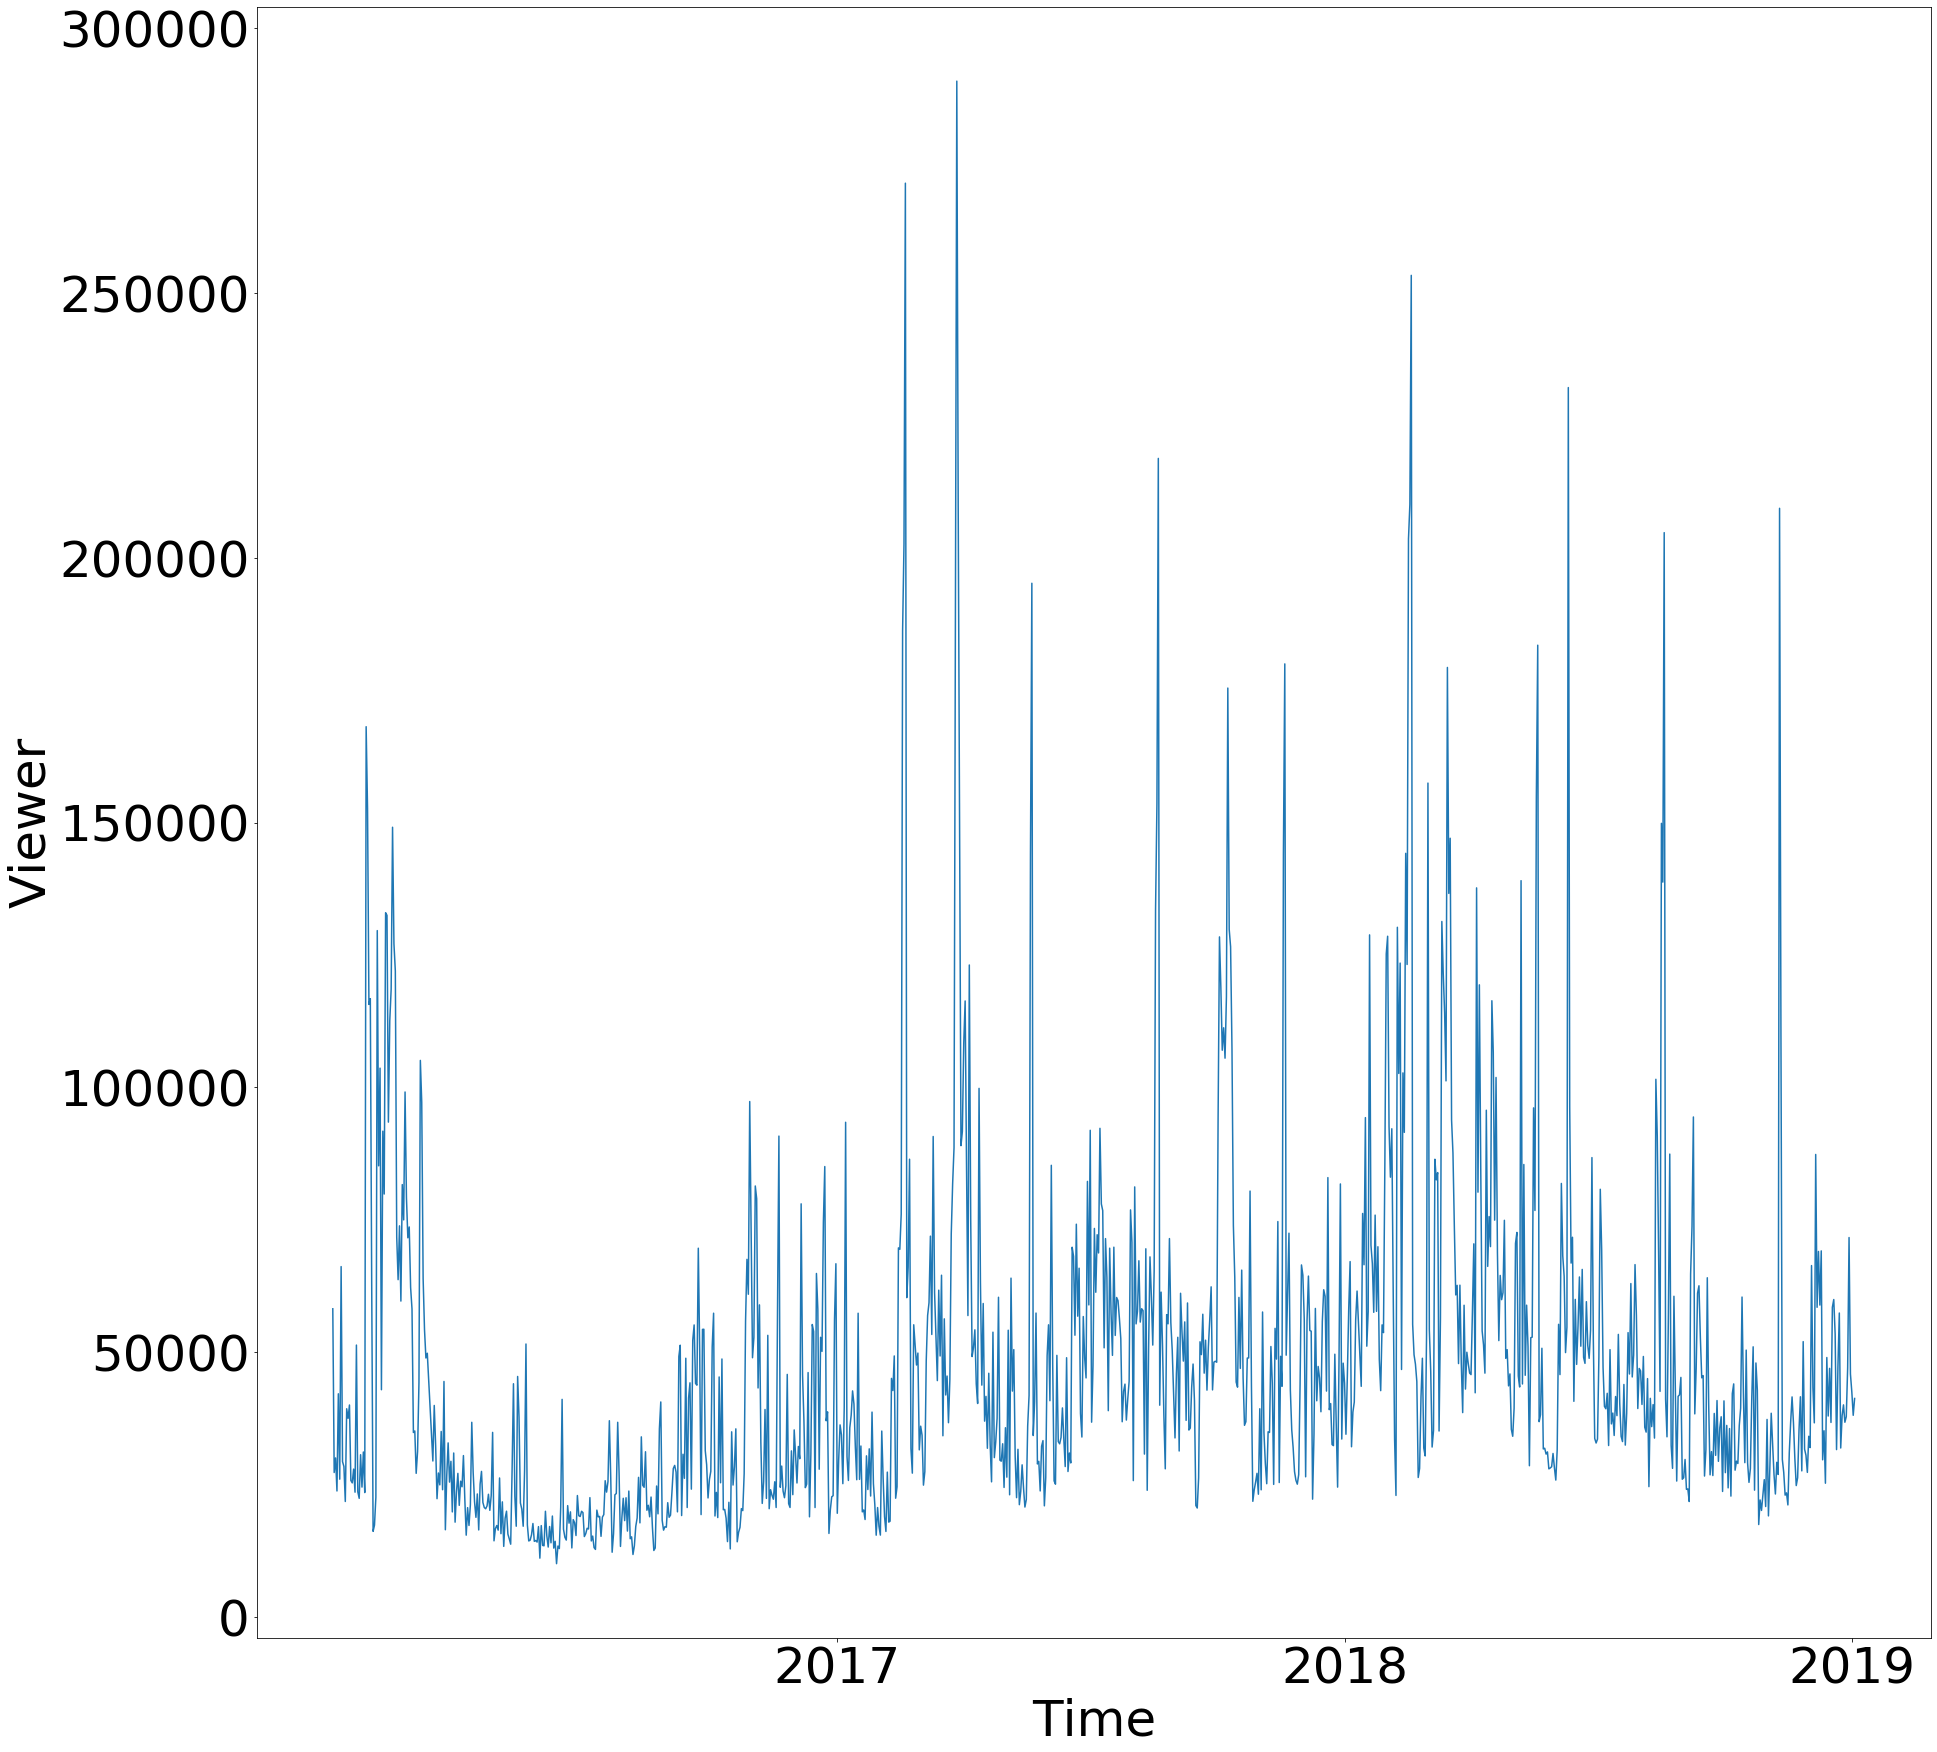

In [145]:
#開啟遊戲觀看人數折線圖
with open('ubisoft_marge.json','r') as fp:
    tmp = json.loads(fp.read())

x = tmp['Date']
y = tmp['Viewers']
test = list()
test2 = list()
#test.append(tmp['Date'])
for i in tmp['Date']:
    test.append(i)

for i in tmp['Viewers']:
    test2.append(i)

cdt = ["2017-12-31","2018-12-31","2019-12-31"]
PlaceCdt = ["2017","2018","2019"]
print(len(x))
print(len(y))
plt.plot(test,test2)
plt.rcParams["figure.figsize"] = (30, 30)
plt.xticks(cdt,PlaceCdt)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel("Viewer",fontsize = 50)
plt.xlabel("Time",fontsize = 50)
plt.savefig("ubisoft_marge.png")

In [ ]:
def pictureGame():
    

870
870


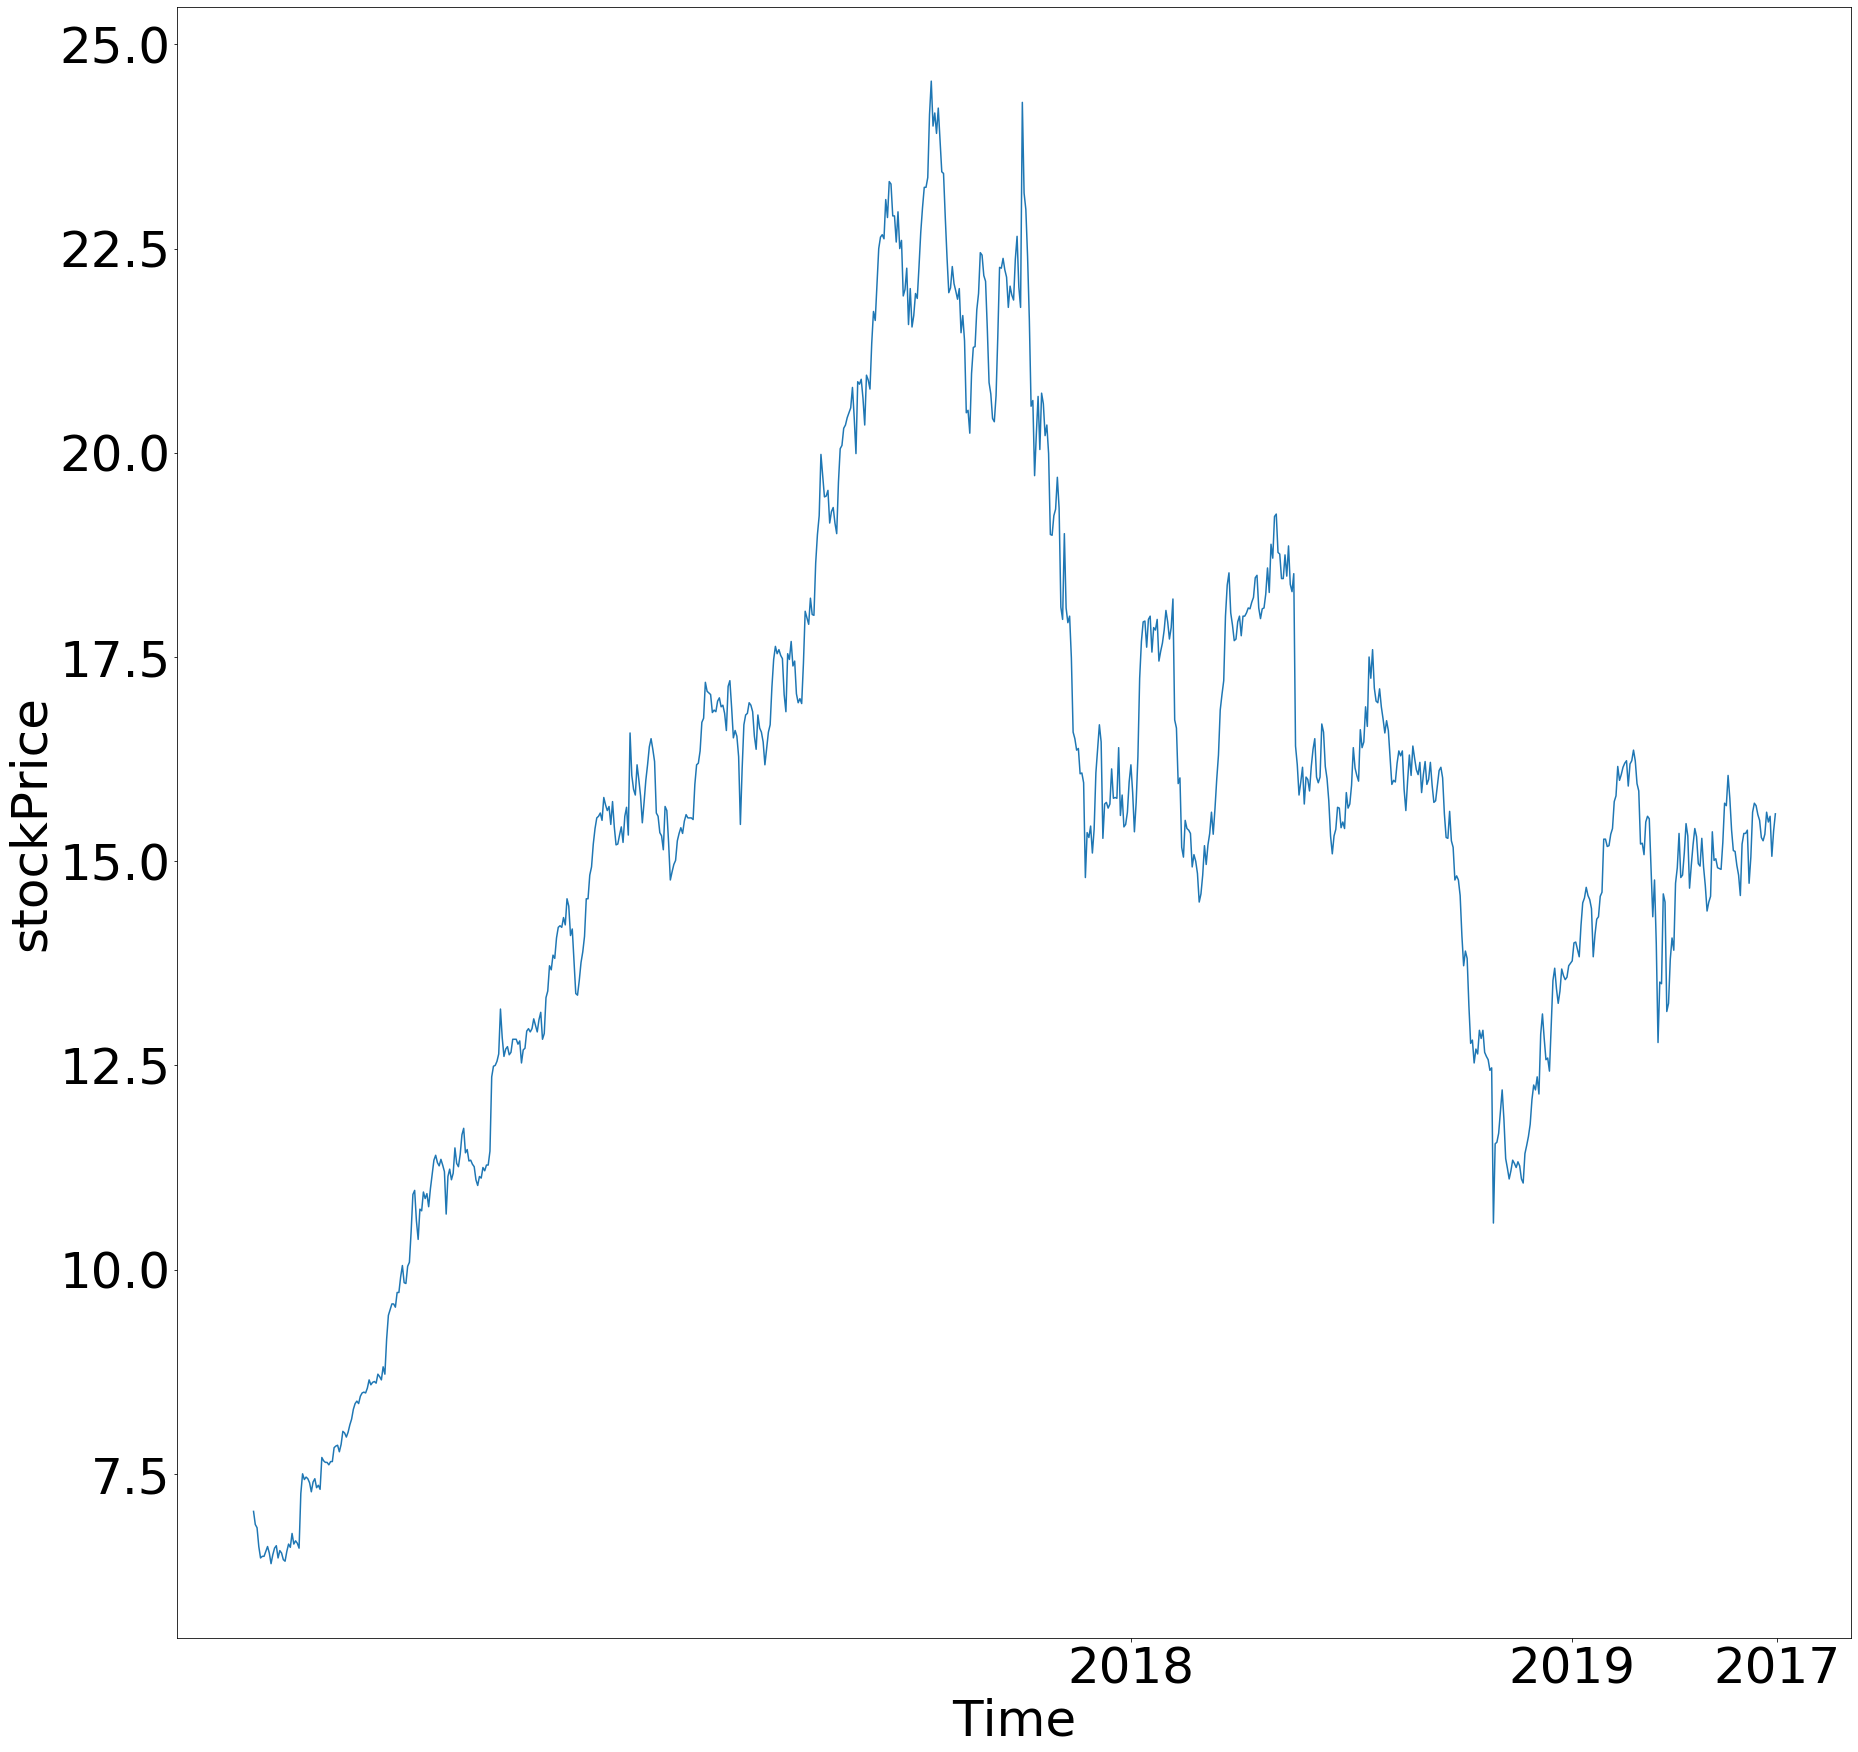

In [223]:
#開啟公司股票折線圖
with open('ubisoft_StockPrice.json','r') as fp:
    tmp = json.loads(fp.read())

x = tmp['Date']
y = tmp['stockPrice']
test = list()
test2 = list()
#test.append(tmp['Date'])
for i in tmp['Date']:
    test.append(i)

for i in tmp['stockPrice']:
    test2.append(i)

cdt = ["2017-12-31","2018-12-31","2019-12-31"]
PlaceCdt = ["2017","2018","2019"]
print(len(x))
print(len(y))
plt.plot(test,test2)
plt.rcParams["figure.figsize"] = (30, 30)
plt.xticks(cdt,PlaceCdt)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylabel("stockPrice",fontsize = 50)
plt.xlabel("Time",fontsize = 50)
plt.savefig("ubisoft_StockPrice.png")
    